Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166

<ipython-input-5-98c2085ec69d>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


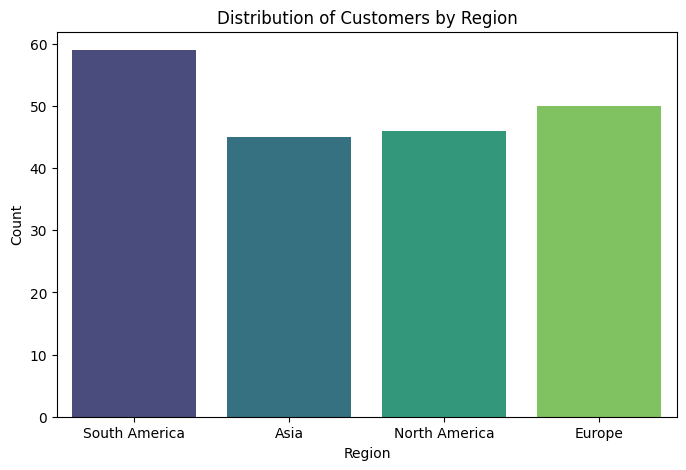

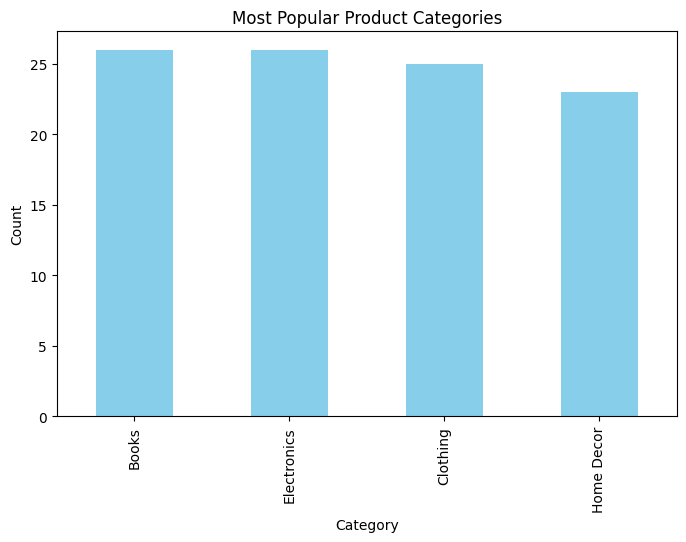

<ipython-input-5-98c2085ec69d>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_sales.head(10), x='TotalValue', y='ProductName', palette='magma')


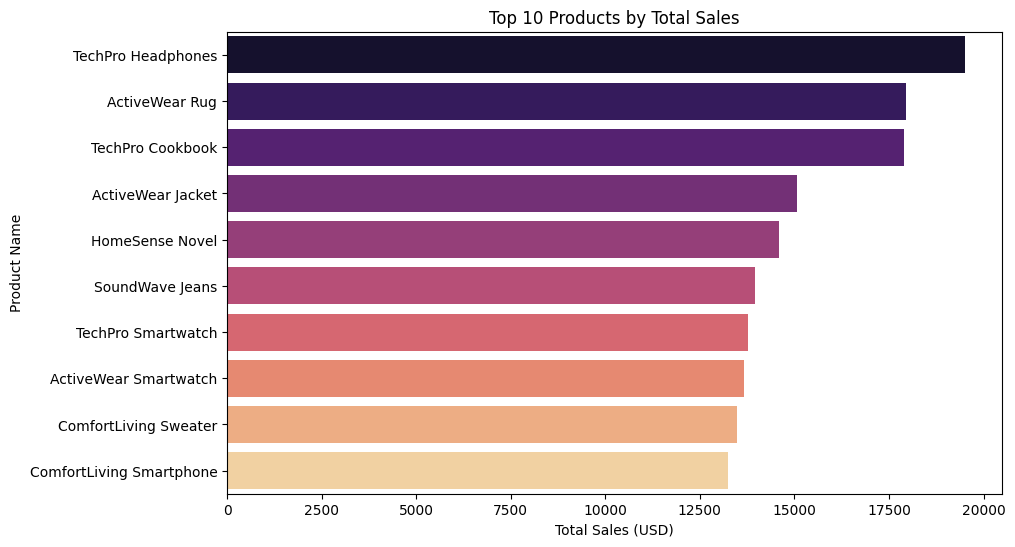

EDA Completed. Visualizations and summary are ready.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

customers_file = 'Customers.csv'
products_file = 'Products.csv'
transactions_file = 'Transactions.csv'

try:

    customers = pd.read_csv(customers_file)
    products = pd.read_csv(products_file)
    transactions = pd.read_csv(transactions_file)


    print("Customers Dataset:\n", customers.head())
    print("\nProducts Dataset:\n", products.head())
    print("\nTransactions Dataset:\n", transactions.head())


    print("\nCustomers Info:\n")
    print(customers.info())
    print("\nProducts Info:\n")
    print(products.info())
    print("\nTransactions Info:\n")
    print(transactions.info())


    print("\nMissing Values:\n")
    print("Customers:\n", customers.isnull().sum())
    print("Products:\n", products.isnull().sum())
    print("Transactions:\n", transactions.isnull().sum())


    print("\nDescriptive Statistics:\n")
    print("Customers:\n", customers.describe(include='all'))
    print("Products:\n", products.describe(include='all'))
    print("Transactions:\n", transactions.describe(include='all'))


    plt.figure(figsize=(8, 5))
    sns.countplot(data=customers, x='Region', palette='viridis')
    plt.title('Distribution of Customers by Region')
    plt.xlabel('Region')
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(8, 5))
    products['Category'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Most Popular Product Categories')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()


    total_sales = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()
    total_sales = total_sales.merge(products, on='ProductID', how='inner')
    total_sales = total_sales.sort_values('TotalValue', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=total_sales.head(10), x='TotalValue', y='ProductName', palette='magma')
    plt.title('Top 10 Products by Total Sales')
    plt.xlabel('Total Sales (USD)')
    plt.ylabel('Product Name')
    plt.show()


    with open('EDA_Summary.txt', 'w') as f:
        f.write("EDA Summary:\n")
        f.write("\nCustomers:\n" + str(customers.describe(include='all')))
        f.write("\nProducts:\n" + str(products.describe(include='all')))
        f.write("\nTransactions:\n" + str(transactions.describe(include='all')))

    print("EDA Completed. Visualizations and summary are ready.")

except FileNotFoundError as e:
    print(f"Error: {e}\nPlease ensure the CSV files are in the correct location.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
